In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys
import glob
import warnings
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pyarrow 

### Read the data

In [2]:
df = pd.read_parquet('../data/events_with_hit_features_[cut_off_time=0.5].parquet')

In [3]:
df_selected = df.dropna()

In [4]:
df_muons = df_selected.query('`class`== "muon"')

### Train test split 

In [5]:
train_df, test_df_muon = train_test_split(df_muons, random_state=42)

In [6]:
test_df = pd.concat([test_df_muon, df_selected.query('`class`== "pion"')])

In [7]:
train_df.columns

Index(['composite_event_id', 'total_in_time_hits', 'x_aligned_min',
       'x_aligned_max', 'x_aligned_width', 'y_aligned_min', 'y_aligned_max',
       'y_aligned_width', 'hit_distance_min', 'hit_distance_max',
       'hit_distance_mean', 'hit_distance_median', 'hit_distance_q25',
       'hit_distance_q75', 'hit_distance_rms', 'hull_area', 'hull_diameter',
       'hull_diff_width_diameter', 'hull_width', 'run_id', 'burst_id',
       'event_id', 'track_id', 'track_momentum', 'chod_time', 'track_pos_x',
       'track_pos_y', 'ring_radius', 'ring_centre_pos_x', 'ring_centre_pos_y',
       'ring_likelihood_pion', 'ring_likelihood_muon',
       'ring_likelihood_positron', 'ring_likelihood_kaon',
       'ring_likelihood_background', 'label', 'first_hit', 'last_hit',
       'total_hits', 'class', 'mass', 'ring_radius_cal'],
      dtype='object')

In [8]:
train_df.shape

(1618976, 42)

In [9]:
X_train = train_df.iloc[:, 1:19]
y_train = train_df['ring_radius_cal']
X_test = test_df.iloc[:, 1:19]
y_test = test_df['ring_radius_cal']

In [10]:
X_train.shape

(1618976, 18)

### Fit XGBRegressor

In [11]:
xgb_reg = xgb.XGBRegressor()

In [12]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [13]:
pwd

'/Users/Jialing/591/project_make/notebooks'

In [14]:
import pickle

In [15]:
with open('../../full_data/xgb_model.pkl', 'rb') as file:
    xgb_reg = pickle.load(file)

In [16]:
xgb_reg.score(X_test, y_test)

0.9390271288739928

In [17]:
xgb_reg.score(X_train, y_train)

0.9377273901548142

In [18]:
test_df

,composite_event_id,total_in_time_hits,x_aligned_min,x_aligned_max,x_aligned_width,y_aligned_min,y_aligned_max,y_aligned_width,hit_distance_min,hit_distance_max,...,ring_likelihood_positron,ring_likelihood_kaon,ring_likelihood_background,label,first_hit,last_hit,total_hits,class,mass,ring_radius_cal
1394664,538946926302625,16,-208.504181,151.495819,360.000000,-220.540649,184.759338,405.299988,133.522385,220.790665,...,1.223099e-01,1.216099e-37,1.216099e-37,0,57101606,57101691,85,muon,105.660004,185.005157
542241,1135981740882291,8,-106.457184,109.542816,216.000000,-161.085602,135.094406,296.179993,136.465652,172.411011,...,1.216099e-37,1.216099e-37,1.216099e-37,0,21300348,21300371,23,muon,105.660004,137.621536
91278,1536203972418849,21,-218.038269,177.961746,396.000000,-200.466705,95.713280,296.179993,141.687149,219.957947,...,3.009703e-02,1.216099e-37,1.216099e-37,0,3594477,3594529,52,muon,105.660004,186.233276
2068331,62858391578312,17,-175.623779,175.376236,351.000000,-181.238815,192.881195,374.119995,161.667465,214.934067,...,1.000000e+00,1.216099e-37,1.216099e-37,0,85719909,85719941,32,muon,105.660004,184.253876
1977295,118933484587223,12,-176.955444,120.044548,297.000000,-137.636017,142.963989,280.600006,125.497978,206.509338,...,1.216099e-37,1.216099e-37,1.216099e-37,0,81858655,81858689,34,muon,105.660004,148.973877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376022,1285741430277,18,-125.918549,171.081467,297.000000,-190.509811,168.020187,358.529999,145.334030,215.536346,...,2.885544e-20,1.216099e-37,1.216099e-37,1,99396877,99396897,20,pion,139.570007,174.585281
2376023,1285741442709,17,-206.994675,171.005325,378.000000,-183.497131,175.042877,358.540009,135.052322,208.827560,...,1.240671e-10,1.216099e-37,1.216099e-37,1,99396897,99396934,37,pion,139.570007,176.125702
2376024,1285741445816,18,-169.251068,145.748932,315.000000,-144.693497,151.486496,296.179993,137.323990,195.537567,...,1.216099e-37,1.216099e-37,1.216099e-37,1,99396934,99397014,80,pion,139.570007,148.410736
2376025,1285741458948,15,-185.357407,170.542603,355.900024,-199.679688,80.910294,280.589966,149.758682,217.553619,...,2.527895e-20,1.216099e-37,1.216099e-37,1,99397014,99397032,18,pion,139.570007,172.438187


In [19]:
test_result = test_df.copy()

### Predict on the entire dataset

In [20]:
test_result['radius_pred'] = xgb_reg.predict(test_result.iloc[:, 1:19])

In [21]:
test_result

,composite_event_id,total_in_time_hits,x_aligned_min,x_aligned_max,x_aligned_width,y_aligned_min,y_aligned_max,y_aligned_width,hit_distance_min,hit_distance_max,...,ring_likelihood_kaon,ring_likelihood_background,label,first_hit,last_hit,total_hits,class,mass,ring_radius_cal,radius_pred
1394664,538946926302625,16,-208.504181,151.495819,360.000000,-220.540649,184.759338,405.299988,133.522385,220.790665,...,1.216099e-37,1.216099e-37,0,57101606,57101691,85,muon,105.660004,185.005157,187.417419
542241,1135981740882291,8,-106.457184,109.542816,216.000000,-161.085602,135.094406,296.179993,136.465652,172.411011,...,1.216099e-37,1.216099e-37,0,21300348,21300371,23,muon,105.660004,137.621536,145.329178
91278,1536203972418849,21,-218.038269,177.961746,396.000000,-200.466705,95.713280,296.179993,141.687149,219.957947,...,1.216099e-37,1.216099e-37,0,3594477,3594529,52,muon,105.660004,186.233276,184.742874
2068331,62858391578312,17,-175.623779,175.376236,351.000000,-181.238815,192.881195,374.119995,161.667465,214.934067,...,1.216099e-37,1.216099e-37,0,85719909,85719941,32,muon,105.660004,184.253876,186.078079
1977295,118933484587223,12,-176.955444,120.044548,297.000000,-137.636017,142.963989,280.600006,125.497978,206.509338,...,1.216099e-37,1.216099e-37,0,81858655,81858689,34,muon,105.660004,148.973877,149.669556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376022,1285741430277,18,-125.918549,171.081467,297.000000,-190.509811,168.020187,358.529999,145.334030,215.536346,...,1.216099e-37,1.216099e-37,1,99396877,99396897,20,pion,139.570007,174.585281,175.003845
2376023,1285741442709,17,-206.994675,171.005325,378.000000,-183.497131,175.042877,358.540009,135.052322,208.827560,...,1.216099e-37,1.216099e-37,1,99396897,99396934,37,pion,139.570007,176.125702,181.017609
2376024,1285741445816,18,-169.251068,145.748932,315.000000,-144.693497,151.486496,296.179993,137.323990,195.537567,...,1.216099e-37,1.216099e-37,1,99396934,99397014,80,pion,139.570007,148.410736,150.250137
2376025,1285741458948,15,-185.357407,170.542603,355.900024,-199.679688,80.910294,280.589966,149.758682,217.553619,...,1.216099e-37,1.216099e-37,1,99397014,99397032,18,pion,139.570007,172.438187,172.652390


In [22]:
test_result['track_momentum'].describe()

count    755306.000000
mean         36.143753
std          12.013361
min           9.442538
25%          27.424381
50%          35.071695
75%          43.918932
max          74.378830
Name: track_momentum, dtype: float64

### Show distribution of predicted radii of pions and muons in each momentum bin of XGBRegressor

In [23]:
bins = np.arange(9, 76, 1)
test_result['momentum_bin'] = pd.cut(test_result['track_momentum'], bins=bins)

In [24]:
test_result

,composite_event_id,total_in_time_hits,x_aligned_min,x_aligned_max,x_aligned_width,y_aligned_min,y_aligned_max,y_aligned_width,hit_distance_min,hit_distance_max,...,ring_likelihood_background,label,first_hit,last_hit,total_hits,class,mass,ring_radius_cal,radius_pred,momentum_bin
1394664,538946926302625,16,-208.504181,151.495819,360.000000,-220.540649,184.759338,405.299988,133.522385,220.790665,...,1.216099e-37,0,57101606,57101691,85,muon,105.660004,185.005157,187.417419,"(39, 40]"
542241,1135981740882291,8,-106.457184,109.542816,216.000000,-161.085602,135.094406,296.179993,136.465652,172.411011,...,1.216099e-37,0,21300348,21300371,23,muon,105.660004,137.621536,145.329178,"(13, 14]"
91278,1536203972418849,21,-218.038269,177.961746,396.000000,-200.466705,95.713280,296.179993,141.687149,219.957947,...,1.216099e-37,0,3594477,3594529,52,muon,105.660004,186.233276,184.742874,"(44, 45]"
2068331,62858391578312,17,-175.623779,175.376236,351.000000,-181.238815,192.881195,374.119995,161.667465,214.934067,...,1.216099e-37,0,85719909,85719941,32,muon,105.660004,184.253876,186.078079,"(37, 38]"
1977295,118933484587223,12,-176.955444,120.044548,297.000000,-137.636017,142.963989,280.600006,125.497978,206.509338,...,1.216099e-37,0,81858655,81858689,34,muon,105.660004,148.973877,149.669556,"(15, 16]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376022,1285741430277,18,-125.918549,171.081467,297.000000,-190.509811,168.020187,358.529999,145.334030,215.536346,...,1.216099e-37,1,99396877,99396897,20,pion,139.570007,174.585281,175.003845,"(31, 32]"
2376023,1285741442709,17,-206.994675,171.005325,378.000000,-183.497131,175.042877,358.540009,135.052322,208.827560,...,1.216099e-37,1,99396897,99396934,37,pion,139.570007,176.125702,181.017609,"(32, 33]"
2376024,1285741445816,18,-169.251068,145.748932,315.000000,-144.693497,151.486496,296.179993,137.323990,195.537567,...,1.216099e-37,1,99396934,99397014,80,pion,139.570007,148.410736,150.250137,"(19, 20]"
2376025,1285741458948,15,-185.357407,170.542603,355.900024,-199.679688,80.910294,280.589966,149.758682,217.553619,...,1.216099e-37,1,99397014,99397032,18,pion,139.570007,172.438187,172.652390,"(29, 30]"


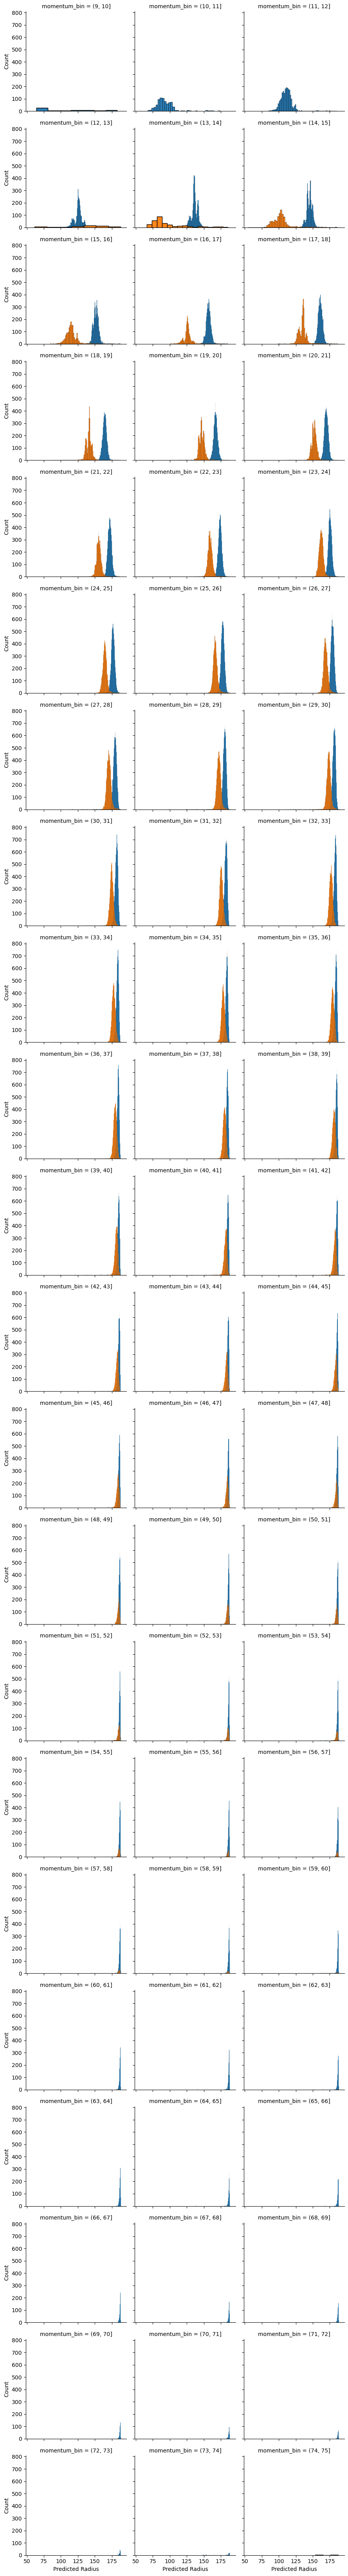

In [25]:
from scipy.stats import scoreatpercentile

g = sns.FacetGrid(test_result, col='momentum_bin', col_wrap=3, hue='class')
g.map(sns.histplot, 'radius_pred', fill=True)
g.map(sns.histplot, 'radius_pred', lw=1)

g.set_axis_labels('Predicted Radius', 'Count')

plt.tight_layout()

plt.show()


### Show numbers of muons and pions in each momentum bin (XGBRegressor)

In [26]:
counts = test_result.groupby('momentum_bin')['class'].value_counts().unstack()

In [27]:
counts.head(60)

class,muon,pion
momentum_bin,,
"(9, 10]",58.0,NaN
"(10, 11]",835.0,NaN
"(11, 12]",2271.0,NaN
"(12, 13]",3240.0,52.0
"(13, 14]",4041.0,303.0
"(14, 15]",4532.0,1014.0
"(15, 16]",4915.0,1725.0
"(16, 17]",5383.0,2389.0
"(17, 18]",6196.0,2830.0


### Find the 2.5% quantile of muons and 97.5% quantile of pions in each bin (XGBRegressor)

In [28]:
stat_pred = pd.DataFrame(test_result.groupby(['momentum_bin', 'class']).aggregate({'radius_pred': ['mean', 'std']}))
stat_pred = stat_pred.dropna()
stat_pred = stat_pred.reset_index()
stat_pred.columns = ['momentum_bin', 'class', 'mean', 'std']

In [29]:
stat_pred['2_5'] = stat_pred['mean'] - 2 * stat_pred['std']
stat_pred['97_5'] = stat_pred['mean'] + 2 * stat_pred['std']

### Calculate the resolution (2.5% quantile of muons - 97.5% of pions) (XGBRegressor)

In [30]:
class_mapping = {'pion': 0, 'muon': 1}

stat_pred['class_numeric'] = stat_pred['class'].map(class_mapping)

pion_quantiles = stat_pred[stat_pred['class'] == 'pion'].groupby('momentum_bin')['mean'].quantile([0.025, 0.975]).unstack()

muon_quantiles = stat_pred[stat_pred['class'] == 'muon'].groupby('momentum_bin')['mean'].quantile([0.025, 0.975]).unstack()

quantiles = pd.DataFrame()
quantiles['difference'] = muon_quantiles[0.025] - pion_quantiles[0.975]


In [31]:
pivoted_df = stat_pred.pivot(index='momentum_bin', columns='class')

difference = pivoted_df['2_5', 'muon'] - pivoted_df['97_5', 'pion']

result_df = pd.DataFrame({'difference': difference})

In [32]:
result_df = result_df.reset_index()

In [33]:
result_df.sort_values(by='difference', ascending=False).head(10)

,momentum_bin,difference
6,"(15, 16]",9.811793
7,"(16, 17]",7.566760
8,"(17, 18]",5.147714
9,"(18, 19]",4.897280
5,"(14, 15]",2.923664
10,"(19, 20]",2.758764
11,"(20, 21]",2.157174
12,"(21, 22]",0.170946
13,"(22, 23]",-0.585037
14,"(23, 24]",-0.904581


### Find the 2.5% quantile of muons and 97.5% quantile of pions in each bin (SOTA)

In [34]:
stat_sota = pd.DataFrame(test_result.query('ring_radius<=1000').groupby(['momentum_bin', 'class']).aggregate({'ring_radius': ['mean', 'std']}))
stat_sota = stat_sota.dropna()
stat_sota = stat_sota.reset_index()
stat_sota.columns = ['momentum_bin', 'class', 'mean', 'std']

In [35]:
stat_sota['2_5'] = stat_sota['mean'] - 2 * stat_sota['std']
stat_sota['97_5'] = stat_sota['mean'] + 2 * stat_sota['std']

### Calculate the resolution (2.5% quantile of muons - 97.5% of pions) (SOTA)

In [36]:
class_mapping = {'pion': 0, 'muon': 1}

stat_sota['class_numeric'] = stat_sota['class'].map(class_mapping)

pion_quantiles = stat_sota[stat_sota['class'] == 'pion'].groupby('momentum_bin')['mean'].quantile([0.025, 0.975]).unstack()

muon_quantiles = stat_sota[stat_sota['class'] == 'muon'].groupby('momentum_bin')['mean'].quantile([0.025, 0.975]).unstack()

quantiles = pd.DataFrame()
quantiles['difference'] = muon_quantiles[0.025] - pion_quantiles[0.975]


In [37]:
pivoted_df_sota = stat_sota.pivot(index='momentum_bin', columns='class')

difference_sota = pivoted_df_sota['2_5', 'muon'] - pivoted_df_sota['97_5', 'pion']

result_df_sota = pd.DataFrame({'difference': difference_sota})

In [38]:
result_df_sota = result_df_sota.reset_index()
result_df_sota.sort_values(by='difference', ascending=False).head(10)

,momentum_bin,difference
5,"(14, 15]",5.115926
6,"(15, 16]",-0.221058
4,"(13, 14]",-3.877510
19,"(28, 29]",-4.892311
16,"(25, 26]",-6.415118
14,"(23, 24]",-6.583318
17,"(26, 27]",-7.111299
8,"(17, 18]",-8.418143
25,"(34, 35]",-8.738322
52,"(61, 62]",-8.908782


### Compare the FPR of muons at 97.5% quantile of pions between XGBRegressor and SOTA

In [39]:
momentum_bins = test_result['momentum_bin'].unique()

decision_boundaries = []
decision_boundaries_sota = []
fprs = []
fprs_sota = []

for momentum_bin in momentum_bins:
    filtered_df = test_result[test_result['momentum_bin'] == momentum_bin]

    grouped_df = filtered_df.groupby('class')

    quantile_975 = grouped_df['radius_pred'].quantile(0.975)

    quantile_975_sota = grouped_df['ring_radius'].quantile(0.975)

    decision_boundary = quantile_975.get('pion')

    decision_boundary_sota = quantile_975_sota.get('pion')

    if decision_boundary is None:
        decision_boundary = np.nan

    if decision_boundary_sota is None:
        decision_boundary_sota = np.nan


    decision_boundaries.append(decision_boundary)

    decision_boundaries_sota.append(decision_boundary_sota)


    filtered_muons = filtered_df[(filtered_df['class'] == 'muon') & (filtered_df['radius_pred'] < decision_boundary)]

    filtered_muons_sota = filtered_df[(filtered_df['class'] == 'muon') & (filtered_df['ring_radius'] < decision_boundary_sota)]

    fpr = filtered_muons.shape[0] / filtered_df[filtered_df['class'] == 'muon'].shape[0]

    fpr_sota = filtered_muons_sota.shape[0] / filtered_df[filtered_df['class'] == 'muon'].shape[0]

    fprs.append(fpr)

    fprs_sota.append(fpr_sota)

result_df = pd.DataFrame({'momentum_bin': momentum_bins, 'decision_boundary': decision_boundaries, 'fpr': fprs, 'fpr_sota': fprs_sota})




In [40]:
result_df.sort_values(by='momentum_bin').head(60)

,momentum_bin,decision_boundary,fpr,fpr_sota
64,"(9, 10]",NaN,0.000000,0.000000
53,"(10, 11]",NaN,0.000000,0.000000
61,"(11, 12]",NaN,0.000000,0.000000
35,"(12, 13]",183.742176,0.999383,0.994444
1,"(13, 14]",167.134878,0.995793,0.993566
38,"(14, 15]",148.569273,0.791041,0.758605
4,"(15, 16]",138.595529,0.001831,0.003866
12,"(16, 17]",141.949350,0.002229,0.052759
22,"(17, 18]",150.687801,0.004680,0.007747
42,"(18, 19]",152.277450,0.001952,0.058559


### Plot the distributions of predicted radii in pions and muons in each momentum bin

In [41]:
sota = test_result.query('ring_radius <= 200')

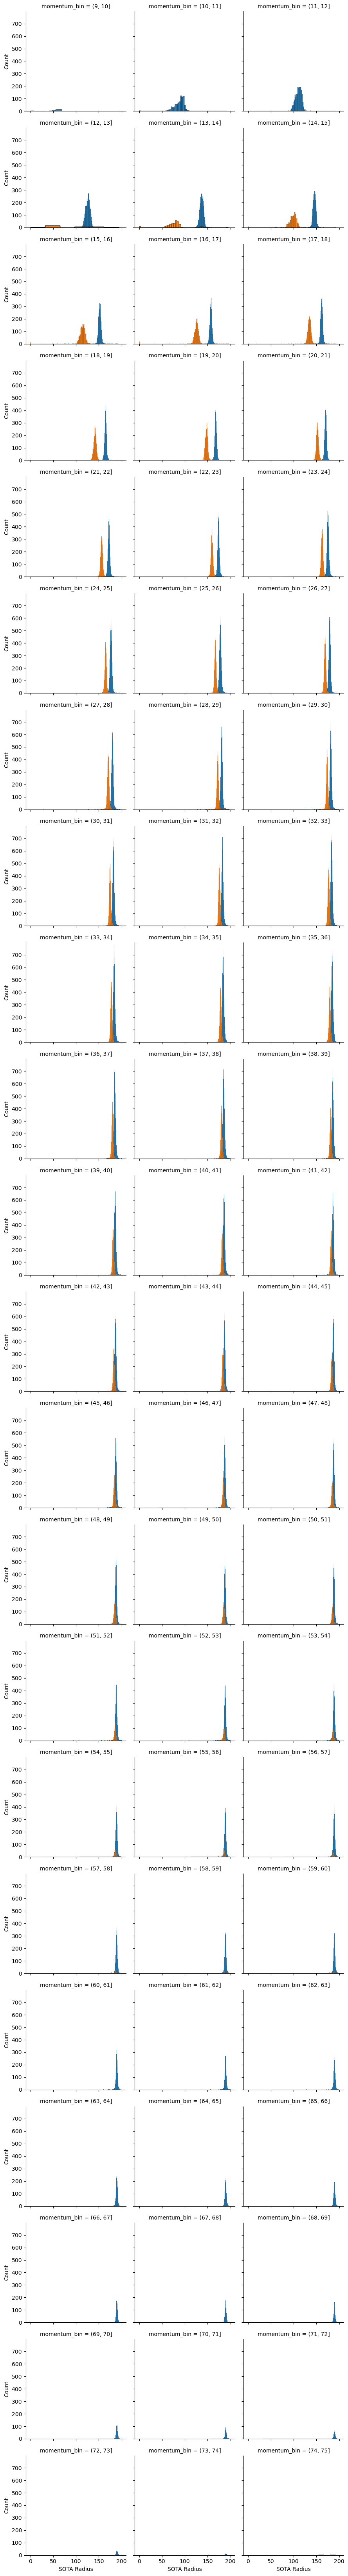

In [42]:
g = sns.FacetGrid(sota, col='momentum_bin', col_wrap=3, hue='class')
g.map(sns.histplot, 'ring_radius', fill=True)
g.map(sns.histplot, 'ring_radius', lw=1)

g.set_axis_labels('SOTA Radius', 'Count')

plt.tight_layout()

plt.show()


### Plot the muons FPR vs. quantiles in each momentum bin for XGBRegressor and SOTA

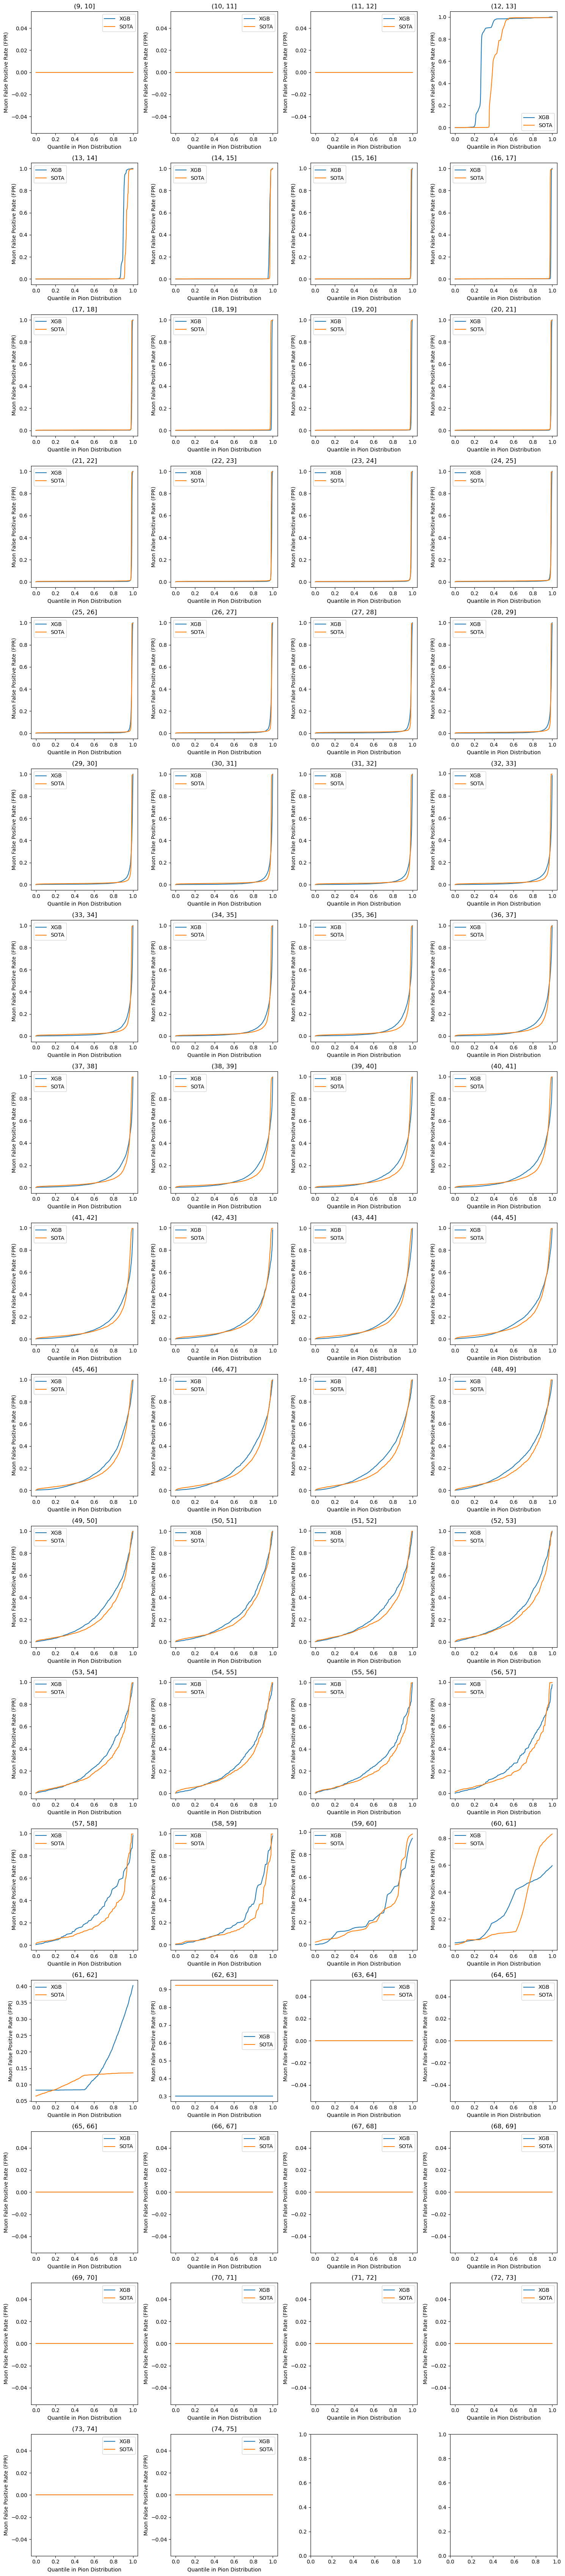

In [43]:
momentum_bins = test_result['momentum_bin'].sort_values().unique()

num_rows = (len(momentum_bins) + 3) // 4
num_cols = min(len(momentum_bins), 4)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

axes = axes.flatten()

for i, momentum_bin in enumerate(momentum_bins):
    filtered_df = test_result[test_result['momentum_bin'] == momentum_bin]

    filtered_muons = filtered_df[filtered_df['class'] == 'muon']
    filtered_pions = filtered_df[filtered_df['class'] == 'pion']

    quantiles = np.linspace(0, 1, num=400)
    decision_boundaries = filtered_pions['radius_pred'].quantile(quantiles)
    decision_boundaries_sota = filtered_pions['ring_radius'].quantile(quantiles)

    fprs_pred = []
    for decision_boundary in decision_boundaries:
        filtered_below_boundary = filtered_muons[filtered_muons['radius_pred'] < decision_boundary]
        fpr_pred = filtered_below_boundary.shape[0] / filtered_muons.shape[0]
        fprs_pred.append(fpr_pred)

    fprs_ring = []
    for decision_boundary in decision_boundaries_sota:
        filtered_below_boundary = filtered_muons[filtered_muons['ring_radius'] < decision_boundary]
        fpr_ring = filtered_below_boundary.shape[0] / filtered_muons.shape[0]
        fprs_ring.append(fpr_ring)

    data_pred = pd.DataFrame({'Quantile': quantiles, 'Muon FPR (radius_pred)': fprs_pred})

    data_ring = pd.DataFrame({'Quantile': quantiles, 'Muon FPR (ring_radius)': fprs_ring})

    ax = axes[i]
    sns.lineplot(data=data_pred, x='Quantile', y='Muon FPR (radius_pred)', ax=ax, label='XGB')
    sns.lineplot(data=data_ring, x='Quantile', y='Muon FPR (ring_radius)', ax=ax, label='SOTA')
    ax.set_xlabel('Quantile in Pion Distribution')
    ax.set_ylabel('Muon False Positive Rate (FPR)')
    ax.set_title(f'{momentum_bin}')
    ax.legend()

# Adjust the subplot layout
plt.tight_layout()

# Show the plots
plt.show()
